In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

## sample data - breast cancer

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))
print("Shape of cancer data: {}" . format(cancer.data.shape))

cancer.keys(): ['target_names', 'data', 'target', 'DESCR', 'feature_names']
Shape of cancer data: (569L, 30L)


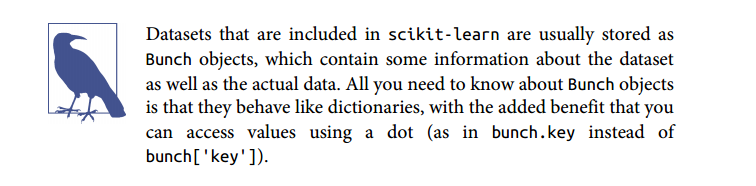

## sample data - Boston Housing

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

# extended boston dataset
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

Data shape: (506L, 13L)
X.shape: (506L, 104L)


# k-Nearest Neighbors

### k-Neighbors classifiation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

### k-neighbors regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
reg.predict(X_test)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83

Strength : easy to understand;
        fast training

Weakness : This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with           datasets where most features are 0 most of the time (so-called sparse datasets).

# Linear Models

### Linear models for regression

In [ ]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
lr.coef_: [ 0.394]
lr.intercept_: -0.031804343026759746

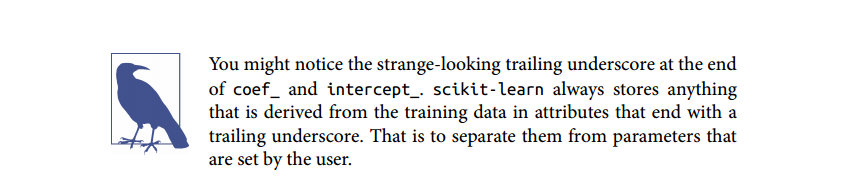

In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
Training set score: 0.67
Test set score: 0.66

### Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

### Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

### Linear models for classifiation

### Logistic Regression and  support vector classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
logreg = LogisticRegression().fit(X_train, y_train)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.01). fit(X_train, y_train)

main trade-off parameter : C  
higher values of C correspond to less regularization 

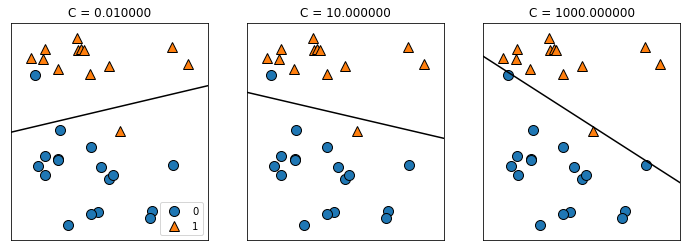

In [6]:
mglearn. plots. plot_linear_svc_regularization()

In [ ]:
# default using l2, now using l1 regularization 
lr_l1 = LogisticRegression(C=C,penalty="l1" ).fit(X_train,y_train)

#### The main parameter of linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression. Large values for alpha or small values for C mean simple models. In particular for the regression models, tuning these parameters is quite important. 

#### Strength and Weakness:
Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. 

Linear models is relatively easy to understand how a prediction is made.

Linear models often perform well when the number of features is large compared to the number of samples. They are also often used on very large datasets, simply because it’s not feasible to train other models. However, in lower-dimensional spaces, other models might yield better generalization performance. 

### Method Chaining

In [ ]:
logreg = LogisticRegression().fit(X_train, y_train)

In [ ]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [ ]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

# Naive Bayes Classifiers

three kinds of naive Bayes classifiers in scikit-learn: GaussianNB, BernoulliNB, and MultinomialNB

GaussianNB is mostly used on very high-dimensional data, while the other two variants of naive Bayes are widely used for sparse count data such as text. 

The models work very well with high-dimensional sparse data and are relatively robust to the parameters. Naive Bayes models are great baseline models and are often used on very large datasets, where training even a linear model might take too long.

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#### pre-pruning the tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

#### Feature importance in trees

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

#### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train, y_train)

#### Strength and Weakness:

Decision trees can easily be visualized and understood by nonexperts (at least for smaller trees), and the algorithms are completely invariant to scaling of the data. 

The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. 

# Ensembles of Decision Trees

### Random forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

#### Strength and Weakness:

Random forests don’t tend to perform well on very high dimensional, sparse data,such as text data. For this kind of data, linear models might be more appropriate. Random forests usually work well even on very large datasets, and training can easily be parallelized over many CPU cores within a powerful computer. However, random forests require more memory and are slower to train and to predict than linear models. If time and memory are important in an application, it might make sense to use a linear model instead.

The important parameters to adjust are n_estimators, max_features, and possibly pre-pruning options like max_depth. For n_estimators, larger is always better. Averaging more trees will yield a more robust ensemble by reducing overfitting. 

### Gradient boosted regression trees (gradient boosting machines)

In [ ]:
# By default, 100 trees of maximum depth 3 and a learning rate of 0.1 
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt. fit(X_train, y_train)

In [ ]:
# changing max_depth and learning_rate
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)

#### Strength and Weakness:

Their main drawback is that they require careful tuning of the parameters and may take a long time to train. Similarly to other tree-based models, the algorithm works well without scaling and on a mixture of binary and continuous features. As with other tree-based models, it also often does not work well on high-dimensional sparse data.

The main parameters of gradient boosted tree models are the number of trees, n_estimators, and the learning_rate, which controls the degree to which each tree is allowed to correct the mistakes of the previous trees. 

In contrast to random forests, where a higher n_estimators value is always better, increasing n_estimators in gradient boosting leads to a
more complex model, which may lead to overfitting. A common practice is to fit n_estimators depending on the time and memory budget, and then search over different learning_rates.

# Kernelized Support Vector Machines

### Kernel Trick: 
#### 1. polynomial kernel 
#### 2. radial basis function (RBF) kernel / Gaussian kernel

In [ ]:
from sklearn.svm import SVC
svc = SVC()  # By default, C=1 and gamma=1/n_features
svm = SVC(kernel='rbf',C=10,gamma=0.1)
svm.fit(X_train,y_train)

### Tuning SVM parameters

gamma: controls the width of the Gaussian kernel
C: a regularization parameter,similar to that used in the linear models. It limits the importance of each point
small gamma and C: more linear boundary
large gamma and C: more complex boundary

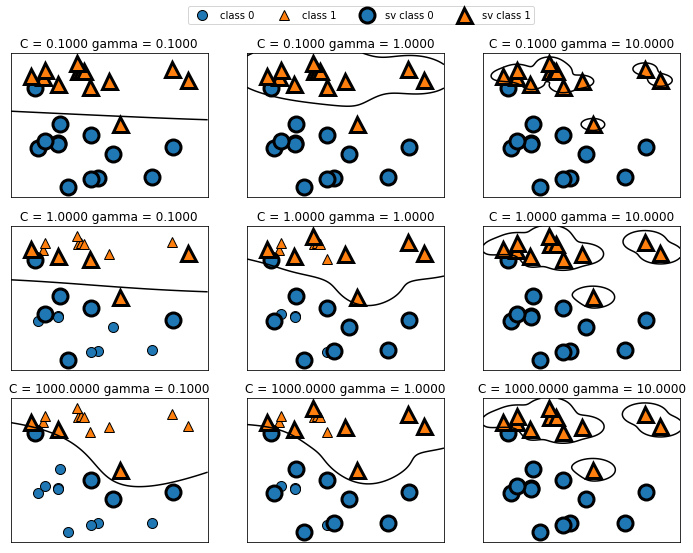

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0,0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

#### Strength and Weakness:

They work well on low-dimensional and high-dimensional data (i.e.,few and many features), but don’t scale very well with the number of samples. 

Another downside of SVMs is that they require careful preprocessing of the data and tuning of the parameters. 

Furthermore, SVM models are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a nonexpert.

# Neural Networks (Deep Learning)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(algorithm='l-bfgs',random_state=0)
mlp.fit(X_train,y_train)

mlp = MLPClassifier(algorithm='l-bfgs' , random_state=0,hidden_layer_sizes=[10])
mlp = MLPClassifier(algorithm='l-bfgs' , random_state=0,hidden_layer_sizes=[10, 10])

#### Strength and Weakness:

Neural networks—particularly the large and powerful ones, often take a long time to train. 

They also require careful preprocessing of the data

Similarly to SVMs, they work best with “homogeneous”data, where all the features have similar meanings. For data that has very different
kinds of features, tree-based models might work better. 

The most important parameters are the number of layers and the number of hidden units per layer. 

# Summary 

### Nearest neighbors: 
#### For small datasets, good as a baseline, easy to explain

### Linear models(linear regression, ridge regression, lasso, logistic regression, support vector classifier): 
#### Go-to as a first algorithm to try, good for very large datasets, good for very highdimensional data.

### Naive Bayes: 
#### Only for classification. Even faster than linear models, good for very large datasets and high-dimensional data. Often less accurate than linear models.

### Decision trees: 
#### Very fast, don’t need scaling of the data, can be visualized and easily explained.

### Random forests: 
#### Nearly always perform better than a single decision tree, very robust and powerful. Don’t need scaling of data. Not good for very high-dimensional sparse data.

### Gradient boosted decision trees:
#### Often slightly more accurate than random forests. Slower to train but faster to predict than random forests, and smaller in memory. Need more parameter tuning than random forests.

### Support vector machines: 
#### Powerful for medium-sized datasets of features with similar meaning. Require scaling of data, sensitive to parameters.

### Neural networks: 
#### Can build very complex models, particularly for large datasets. Sensitive to scaling of the data and to the choice of parameters. Large models need a long time to train.